In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as m
%matplotlib inline
import astropy
import astroquery
from astropy.io import ascii
from astropy import units as u
from astropy.io import fits
from astropy.table import Table
import os
from astropy.coordinates import SkyCoord, Galactic
from matplotlib.colors import LogNorm
from scipy.stats import lognorm
import scipy.stats

# formatting to make plots look nice

m.rc('xtick', direction='in', top=True)
m.rc('ytick', direction='in', right=True)
m.rc('xtick.minor', visible=True)
m.rc('ytick.minor', visible=True)

In [2]:
exo_data = ascii.read('cumulative_2021.07.13_09.04.20.csv')

In [3]:
exo_data.colnames

['kepid',
 'kepoi_name',
 'kepler_name',
 'koi_disposition',
 'koi_pdisposition',
 'koi_score',
 'koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_period',
 'koi_period_err1',
 'koi_period_err2',
 'koi_time0bk',
 'koi_time0bk_err1',
 'koi_time0bk_err2',
 'koi_eccen',
 'koi_eccen_err1',
 'koi_eccen_err2',
 'koi_impact',
 'koi_impact_err1',
 'koi_impact_err2',
 'koi_duration',
 'koi_duration_err1',
 'koi_duration_err2',
 'koi_depth',
 'koi_depth_err1',
 'koi_depth_err2',
 'koi_ror',
 'koi_ror_err1',
 'koi_ror_err2',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_sma',
 'koi_sma_err1',
 'koi_sma_err2',
 'koi_incl',
 'koi_incl_err1',
 'koi_incl_err2',
 'koi_teq',
 'koi_teq_err1',
 'koi_teq_err2',
 'koi_insol',
 'koi_insol_err1',
 'koi_insol_err2',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_tce_delivname',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_slogg',
 'koi_slogg_err1',
 'koi_slogg_err2',
 'koi_smet',
 'koi_smet_err1',
 'koi_smet_err2

In [4]:
planets = np.where(exo_data['koi_disposition'] == "CANDIDATE")
print(planets[0].shape)
len(exo_data['koi_disposition'])

(2362,)


9564

No handles with labels found to put in legend.


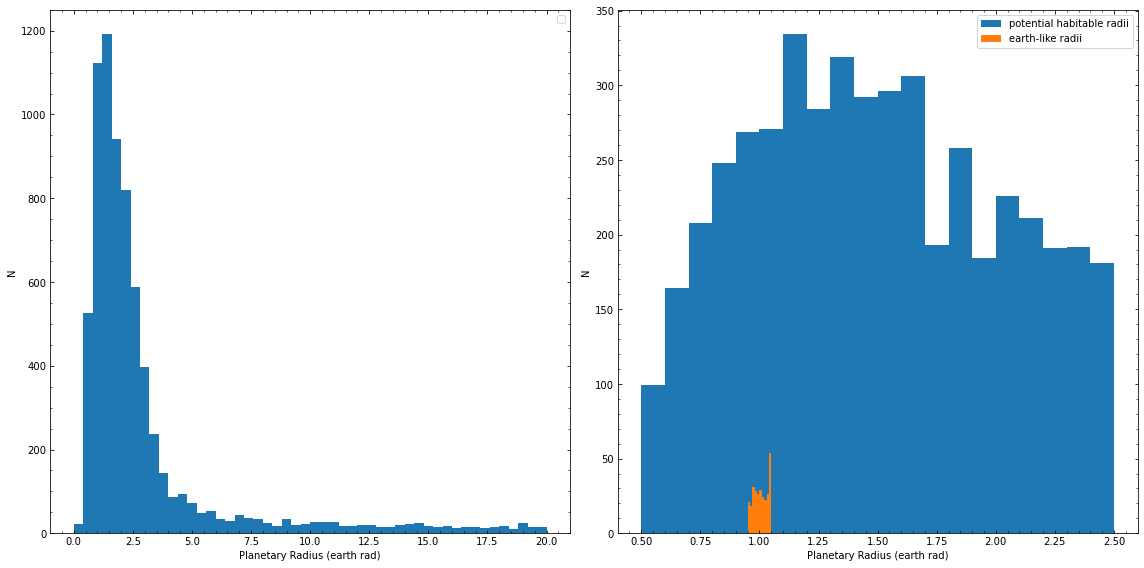

In [5]:
prad = exo_data['koi_prad']
rad_lim = (prad > 0) & (prad < 20)
hab_rad = (prad >= 0.5) & (prad <= 2.5)
earth_rad = (prad >= 0.95) & (prad <= 1.05)

fig1, (ax1,ax2) = plt.subplots(1, 2, figsize = (16,8))
ax1.hist(prad[rad_lim],range=(0,20),bins = 50)
ax2.hist(prad[hab_rad], bins = 20, label = 'potential habitable radii')
ax2.hist(prad[earth_rad], bins = 10, label = 'earth-like radii')

for subpanel in [ax1, ax2]:
    subpanel.set_xlabel('Planetary Radius (earth rad)')
    subpanel.set_ylabel('N')
    subpanel.legend()
    
fig1.tight_layout()

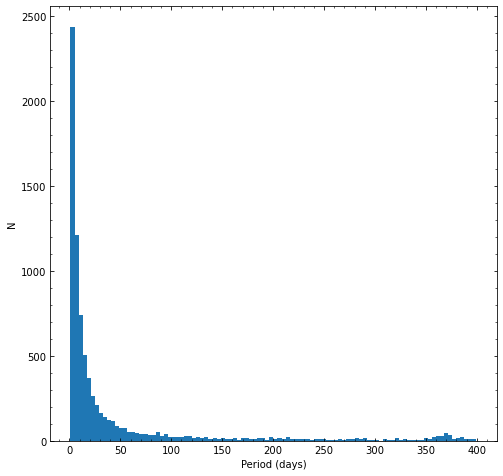

In [6]:
period = exo_data['koi_period']
per = (period > 1) & (period < 400)
plt.figure(figsize = (8,8))
plt.hist(period[per],bins = 100);
plt.xlabel('Period (days)')
plt.ylabel('N');

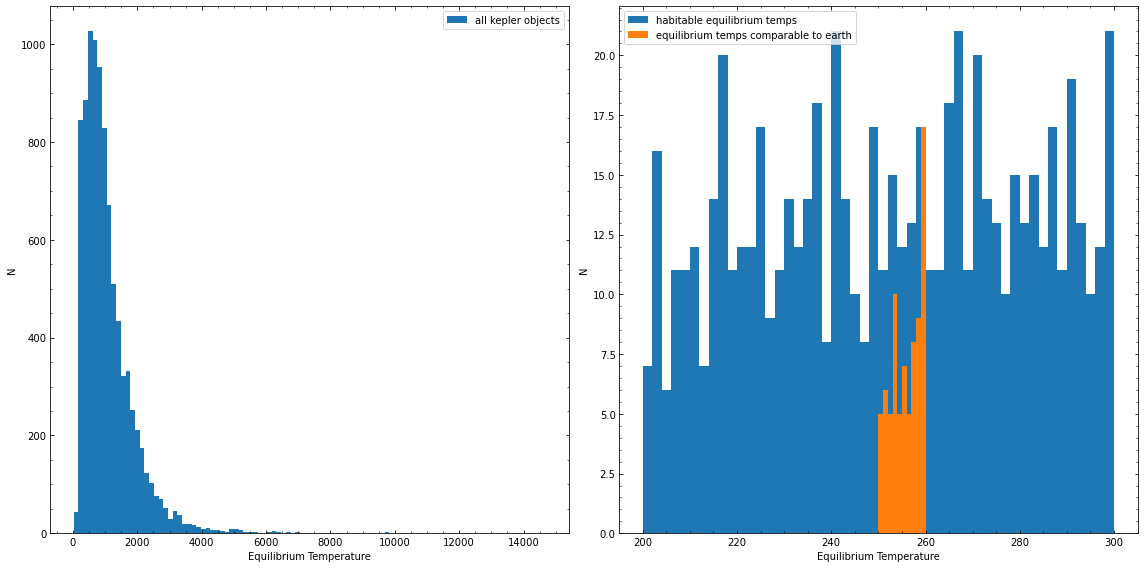

In [7]:
temp = exo_data['koi_teq']
equil_temp = (temp >= 200) & (temp <= 300)
earth_equil = (temp >= 250) & (temp <= 260)
fig3, (ax1,ax2) = plt.subplots(1,2, figsize = (16,8))
ax1.hist(temp, bins = 100, label = 'all kepler objects')
ax2.hist(temp[equil_temp], bins = 50, label = 'habitable equilibrium temps')
ax2.hist(temp[earth_equil], bins = 10, label = 'equilibrium temps comparable to earth')

for plts in [ax1,ax2]:
    plts.set_xlabel('Equilibrium Temperature')
    plts.set_ylabel('N')
    plts.legend()
    fig3.tight_layout();

No handles with labels found to put in legend.


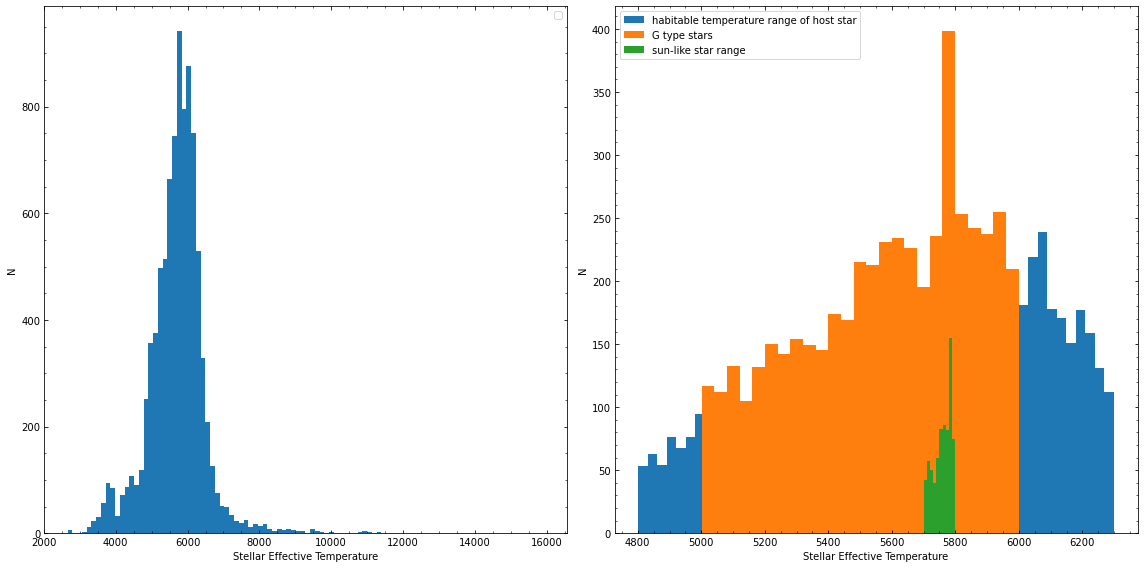

In [8]:
steff = exo_data['koi_steff']
teff_range = (steff > 4800) & (steff < 6300)
g_stars = (steff > 5000) & (steff < 6000)
earth_steff = (steff > 5700) & (steff < 5800)

fig4, (ax1, ax2) = plt.subplots(1,2, figsize = (16,8))
ax1.hist(steff, bins = 100)
ax2.hist(steff[teff_range], bins = 50, label = 'habitable temperature range of host star')
ax2.hist(steff[g_stars], bins = 25, label = 'G type stars')
ax2.hist(steff[earth_steff], bins = 10, label = 'sun-like star range')

for subpanel in [ax1, ax2]:
    subpanel.set_xlabel('Stellar Effective Temperature')
    subpanel.set_ylabel('N')
    subpanel.legend()
    
fig4.tight_layout()

In [9]:
earth_like = np.logical_and(teff_range, equil_temp)
# earth_like = np.logical_and(earth_like, rad_lim)
earth_like = np.logical_and(earth_like, hab_rad)

sma = exo_data['koi_sma']
impact_para = exo_data['koi_impact']
stellar_age = exo_data['koi_sage']
metallicity = exo_data['koi_smet']
len(exo_data['kepoi_name'][earth_like])

319

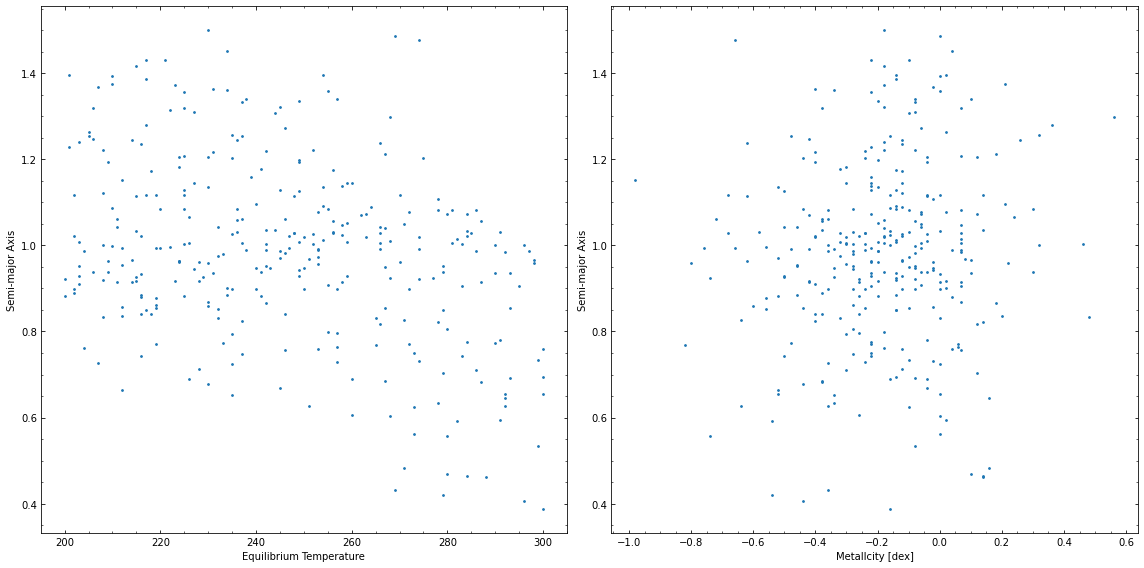

In [10]:
fig5, (ax1, ax2) = plt.subplots(1,2, figsize = (16,8))
ax1.scatter(temp[earth_like], sma[earth_like], s = 3)
ax1.set_xlabel('Equilibrium Temperature')
ax1.set_ylabel('Semi-major Axis')

ax2.scatter(metallicity[earth_like], sma[earth_like], s = 3)
ax2.set_xlabel('Metallcity [dex]')
ax2.set_ylabel('Semi-major Axis');
fig5.tight_layout()

1.  Do you think it's reasonable to say that there's a log uniform distribution of planets with respect to orbital period?  Why or why not?

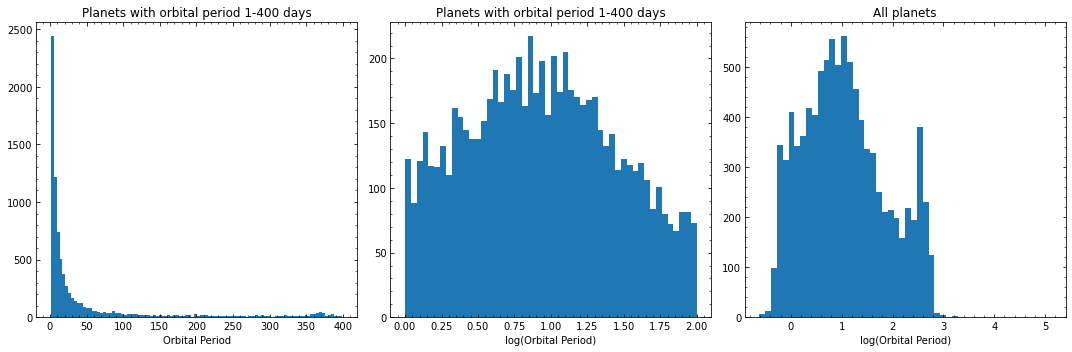

In [11]:
# we can use the cut from above where period is limited to the 1-400

mean = np.mean(exo_data['koi_period'][per])
sd = np.std(exo_data['koi_period'][per])

# true = exo_data['koi_disposition'] == 'CONFIRMED'
# per = np.logical_and(per, true)

fig6,(ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5))
ax1.hist(exo_data['koi_period'][per], bins = 100)

ax2.hist(np.log10(exo_data['koi_period'][per]), bins = 50, range = (0,2.0))
ax2.set_title('Planets with orbital period 1-400 days')
ax2.set_xlim(-0.1,2.1)

ax3.hist(np.log10(exo_data['koi_period']), bins = 50)
ax3.set_title('All planets')

for subplot in [ax1]:
    subplot.set_title('Planets with orbital period 1-400 days')
    subplot.set_xlabel('Orbital Period');
    
for subplot in [ax2, ax3]:
    subplot.set_xlabel('log(Orbital Period)')
fig6.tight_layout()

Theoretically, a lognormal distribution would look like a normal distribution when the x axis is in log space. This....kind of looks like that. To be sure, we can try fitting a lognormal curve to this. (log normal fitting did not turn out well...)

Figure 5 in this paper: https://arxiv.org/ftp/arxiv/papers/1906/1906.06795.pdf shows what it should look like

Text(0.5, 1.0, 'Earth-like planets')

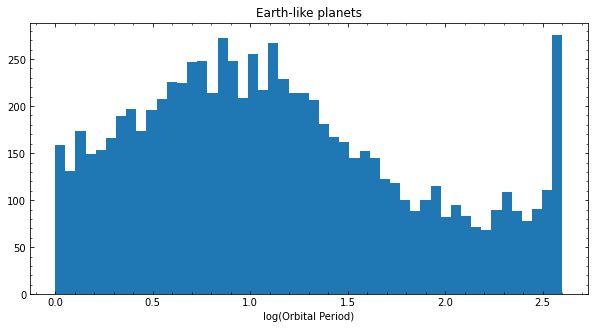

In [12]:
f, ax = plt.subplots(1, 1, figsize = (10,5))
ax.hist(np.log10(exo_data['koi_period'][per]), bins = 50)
ax.set_xlabel('log(Orbital Period)')
ax.set_title('Earth-like planets')
# ax.set_xlim(-0.1,2.1)

# x_exp = exo_data['koi_period'][per]
# mu_exp = np.mean(x_exp)
# sig_exp = np.std(x_exp)
# print(mu_exp, mu)

# fitting_params_lognormal = lognorm.fit(x_exp, floc = 0, scale = mu_exp)
# lognorm_dist_fitted = lognorm(*fitting_params_lognormal)
# t = np.linspace(np.min(x_exp), np.max(x_exp), 100)

# lognorm_dist = lognorm(s = sig_exp, loc = 0, scale = mu_exp)
# ax.plot(np.log10(t), np.log10(lognorm_dist.pdf(t)), color = 'red')

1.5 Do you think this is the real underlying distribution of exoplanets in the galaxy, or do you think it looks this way because of selection effects?  You might need to refresh yourself on how the planets in your sample were detected before you can answer.

I'm gonna hazard a guess that this is not the real underlying distribution of exoplanets... Since Kepler has a 371 day orbit and required 3 transits to be observed before confirming a planet as a transit, it seems more likely that the shorter period planets would get recognized more than longer period planets. 
However, there's that thing about orders of magnitude where for every 1 10 solar mass star, there are 10 1 solar mass stars so it could be something like that. And if you have a bunch of super light stars then it would make sense that those stars would orbit at a smaller radius and faster than the big planets.  

So on the one hand, it's decently likely for this distribution to be false based on the selection effects of Kepler, but on the other hand, it's also possible that there are just more small planets than there are large ones and the small ones have speedy periods.

In [13]:
# the variable for g_stars is defined above, but we need to add our orbital period cut
g_stars = (steff > 5300) & (steff < 6000)
g_stars = np.logical_and(per, g_stars)

k_stars = (exo_data['koi_steff'] > 3500) & (exo_data['koi_steff'] < 5300)
k_stars = np.logical_and(per, k_stars)

m_stars = (exo_data['koi_steff'] > min(exo_data['koi_steff'])) & (exo_data['koi_steff'] < 3500)
m_stars = np.logical_and(per, m_stars)

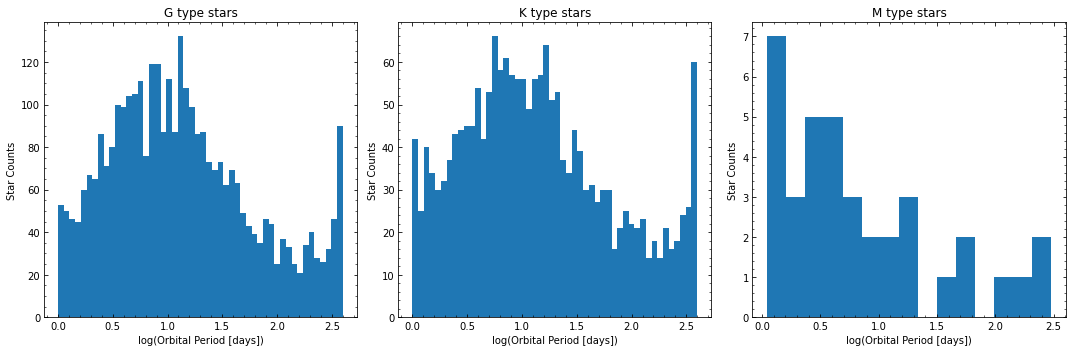

In [14]:
fig7, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5))

ax1.hist(np.log10(exo_data['koi_period'][g_stars]), bins = 50)
ax1.set_title('G type stars')

ax2.hist(np.log10(exo_data['koi_period'][k_stars]), bins = 50)
ax2.set_title('K type stars')

ax3.hist(np.log10(exo_data['koi_period'][m_stars]), bins = 15)
ax3.set_title('M type stars')

for subplot in [ax1, ax2, ax3]:
    subplot.set_xlabel('log(Orbital Period [days])')
    subplot.set_ylabel('Star Counts')
fig7.tight_layout();

All right, so here we can see that both G- and K-type stars have a lognormal distribution if we're only looking at lower periods (1-100 days, so between 0 and 2 in a log scale). Decreasing the bin size on the M-type stars makes the distribution look more exponential than anything else, so G- and K-type stars are probably the better candidates if we really want to have a lognormal distribution.  

2.  Can you find the "radius valley"?  Where is it?  Is it the same at all orbital periods?  If not, estimate the period dependency.

<ipython-input-26-b1b810862e75>:34: RuntimeWarning: divide by zero encountered in log10
  ax2.hist(np.log10(exo_data['koi_prad'][low_per]), bins = 50)#, range = (0.1,2.7))
<ipython-input-26-b1b810862e75>:38: RuntimeWarning: divide by zero encountered in log10
  ax3.hist(np.log10(exo_data['koi_prad'][high_per]), bins = 75)#, range = (0.1,2.7))


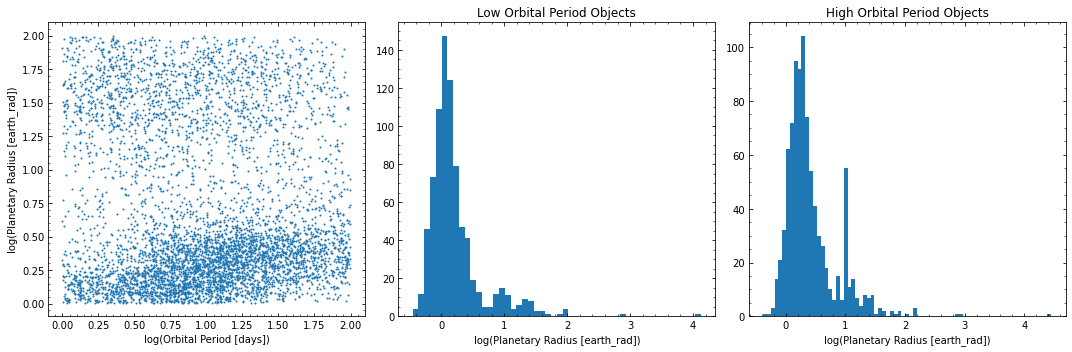

In [26]:
fig7,(ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5))

simple_cut = (exo_data['koi_period'] > 1) & (exo_data['koi_period'] < 100) & (exo_data['koi_prad'] > 1) & (exo_data['koi_prad'] < 100)
low_per = (exo_data['koi_period'] > 1) & (exo_data['koi_period'] < 10)
high_per = (exo_data['koi_period'] > 10) & (exo_data['koi_period'] < 100)
cand = exo_data['koi_disposition'] == "CANDIDATE"
non_giant = exo_data['koi_srad'] < 10
impact = exo_data['koi_impact'] < 0.7
bright = exo_data['koi_kepmag'] < 14.2


low_per = np.logical_and(cand, low_per)
# low_per = np.logical_and(rad_cut, low_per)
# low_per = np.logical_and(teff_range, low_per)
# low_per = np.logical_and(low_per, non_giant)
# low_per = np.logical_and(low_per, impact)
# low_per = np.logical_and(low_per, bright)

high_per = np.logical_and(cand, high_per)
# high_per = np.logical_and(rad_cut, high_per)
# high_per = np.logical_and(high_per, teff_range)
# high_per = np.logical_and(high_per, non_giant)
# high_per = np.logical_and(high_per, impact)
# high_per = np.logical_and(high_per, bright)


ax1.scatter(np.log10(exo_data['koi_period'][simple_cut]), np.log10(exo_data['koi_prad'][simple_cut]), s = 1)
# ax1.plot(np.log10([1,100]),np.log10([2.25,1.1]), 'r', label = 'Radius Valley')
ax1.set_xlabel('log(Orbital Period [days])')
ax1.set_ylabel('log(Planetary Radius [earth_rad])')
# ax1.set_ylim(-1,1)   


ax2.hist(np.log10(exo_data['koi_prad'][low_per]), bins = 50)#, range = (0.1,2.7))
ax2.set_title('Low Orbital Period Objects')
ax2.set_xlabel('log(Planetary Radius [earth_rad])')

ax3.hist(np.log10(exo_data['koi_prad'][high_per]), bins = 75)#, range = (0.1,2.7))
ax3.set_title('High Orbital Period Objects')
ax3.set_xlabel('log(Planetary Radius [earth_rad])');


fig7.tight_layout()

https://astrobites.org/2020/12/30/mind-the-gap-investigating-a-potential-cause-of-the-exoplanet-radius-valley/ \
There is a slight density drop off along the red line above. This can also be seen in figure 2 of the linked article. The radius valley (aka a lower density area of exoplanets) lies along a line that is described by radius decreasing while orbital period increases. So we're basically seeing that small planets with long orbital periods are less likely to occur than small planets with short orbital periods. Likewise, planets with larger radii and shorter orbital periods are less common than large planets with long orbital periods. 

Based on the histogram that is given in figure 2 of that paper, we should be seeing a double peak when we look at histograms for high and low orbital period. We aren't seeing those. I tried changing the range of the histos so that I could maybe see that behavior on the lower planetary radius end, but that's not happening. We definitely do see more smaller radii objects when we have a lower orbital period which makes sense based on the statement above, but even with a wider range, we don't get the double peaked behavior. So the radius valley while kind of visible by eye in the first plot, but it's not visible in either of the histograms

3.  Correcting for the orbital geometric transit probability, what eta_Earth can you obtain?  Provide references and/or reasoning for your choices of constraints on stellar and planetary properties.

In [16]:
# orbital geometric transit probability

srad_au = exo_data['koi_srad'] * 0.00465047 # check this conversion
sma_au = exo_data['koi_sma']
alpha_half = np.arctan(srad_au / sma_au)

In [17]:
# def visual_prob(alpha_half):
#     prob = 4 * np.pi * np.cos(alpha_half) / (4 * np.pi)
#     return prob

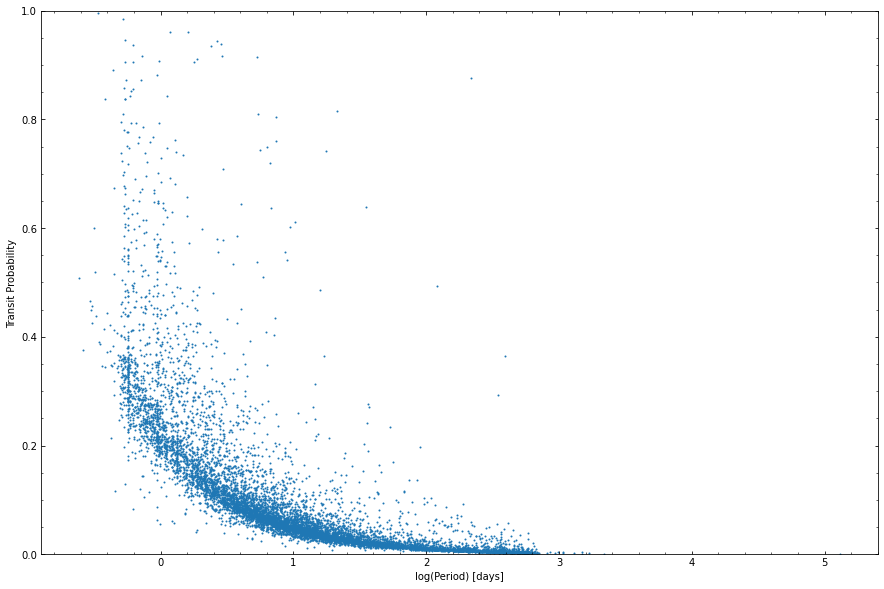

In [18]:
vis_prob = srad_au / sma_au
plt.figure(figsize = (15,10))
plt.scatter(np.log10(exo_data['koi_period']), vis_prob, s = 1)
plt.xlabel('log(Period) [days]')
plt.ylim(0,1)
plt.ylabel('Transit Probability');

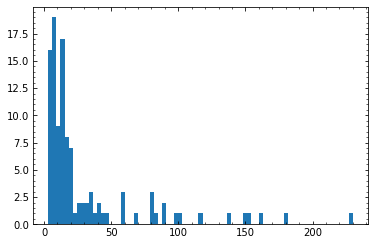

In [19]:
greater = vis_prob > 1
plt.hist(exo_data['koi_srad'][greater], bins = 75);